<a href="https://colab.research.google.com/github/Elizabeth-George-M/LLM/blob/main/2348516_LLM_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1

In [1]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer


#model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

#Test case
text = "I love this product!"
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)
predictions = outputs.logits.argmax(dim=-1)

label_map = {0: 'Negative', 1: 'Positive'}  # SST-2 labels

print(f"Predicted sentiment: {label_map[predictions.item()]}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Predicted sentiment: Positive


#Question 2

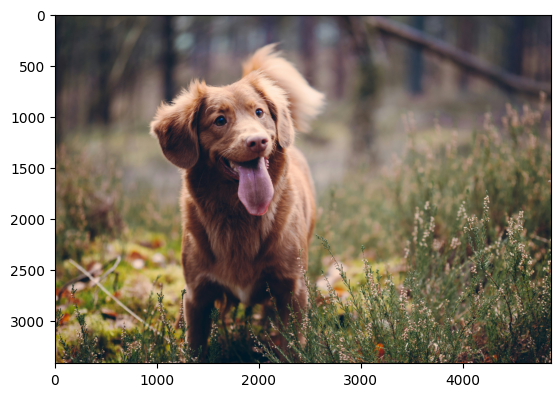

Similarity between text and image: 0.20058850944042206


In [8]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import matplotlib.pyplot as plt


model_name = "openai/clip-vit-base-patch32"
processor = CLIPProcessor.from_pretrained(model_name)
model = CLIPModel.from_pretrained(model_name)

text = "A photo of a cat."

inputs_text = processor(text=text, return_tensors="pt")

image = Image.open("/content/jamie-street-0nk6XZp7_1E-unsplash.jpg")
plt.imshow(image)
plt.show()

inputs_image = processor(images=image, return_tensors="pt")

inputs_combined = {**inputs_text, **inputs_image}

outputs = model(**inputs_combined)

text_embeddings = outputs.text_embeds
image_embeddings = outputs.image_embeds

similarity = torch.nn.functional.cosine_similarity(text_embeddings, image_embeddings)
print(f"Similarity between text and image: {similarity.item()}")